## Introduction

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Required to import, and briefly discuss, the libraries that will be used throughout analysis and modelling. |

---

In [1]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# Libraries for data loading, data manipulation and data visulisation
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization
import re
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 ###



ModuleNotFoundError: No module named 'tensorflow'

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maestro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maestro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maestro\AppData\Roaming\nltk_data...


True

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Load the data from the `train and test` file into a DataFrame. |

---

In [2]:
# loaded the data from the df file as a dataFrame
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
#displays the number of rows and columns 
df_train.shape
df_test.shape

(10546, 2)

In [5]:
''''
Displays info about the columns
'message' is categorical whereas
'tweetId' & 'sentiment' are numerical
'''
df_train.info()
print("\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


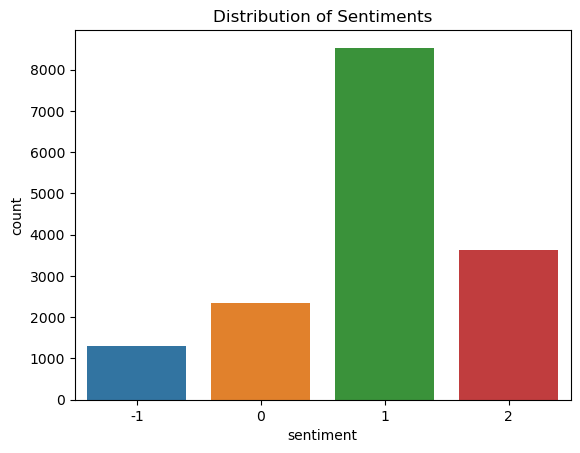

In [6]:
'''
The distribution of classes in 'sentiment'
1(reference class) has the highest distribution
'''

sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()

#### Proportion of tweets in each sentiment

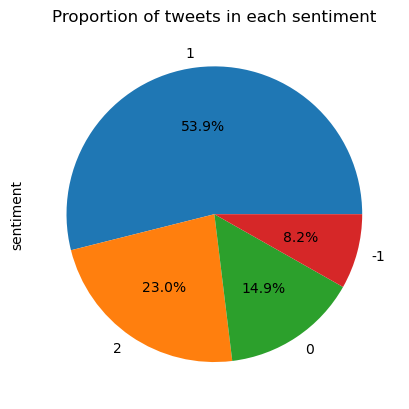

In [7]:
# Plot the proportion of tweets in each sentiment
perc = df_train['sentiment'].value_counts()
perc.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of tweets in each sentiment')

plt.show()

#### Tweet Data Analysis

1. Average length of tweets

In [12]:
# Analyze the characteristics of the tweet text
df_train['tweet_length'] = df_train['message'].apply(len)

2. Distribution of tweet length

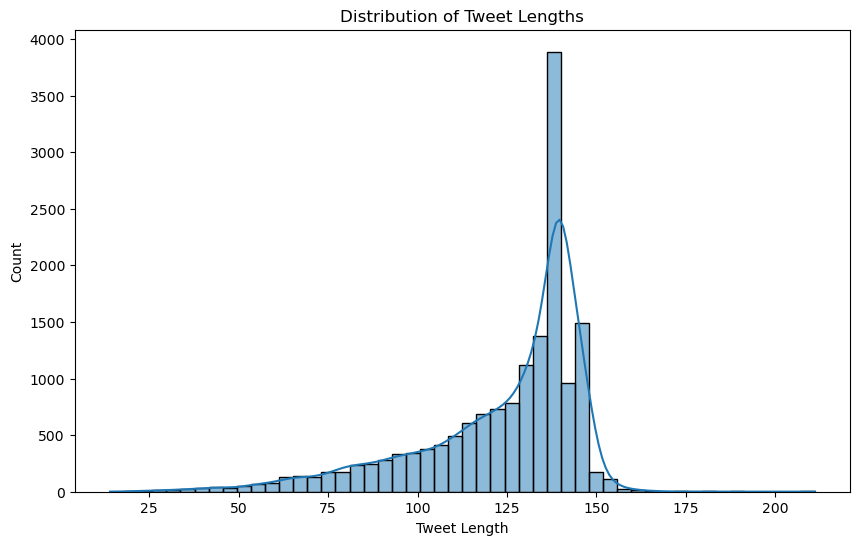

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

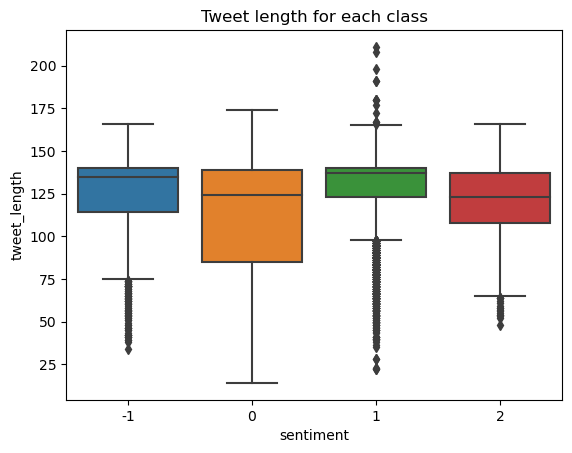

In [13]:
# Plot the distribution of the length tweets for each class using a box plot

sns.boxplot(x=df_train['sentiment'], y=df_train['tweet_length'], data=df_train)
plt.title('Tweet length for each class')
plt.show()

3. Common words and phrases

In [13]:
'''
Concatenates the all the tweets into a single string
and tokenises the text into individual words and
outputs the most common words & its frequencies
'''
all_text = ' '.join(df_train['message'].astype(str))

tokens = word_tokenize(all_text)
fdist = FreqDist(tokens)
common_words = fdist.most_common(10)
print("Common Words:", common_words)

bi_grams = list(bigrams(tokens))
bi_gram_freq = FreqDist(bi_grams)
common_bigrams = bi_gram_freq.most_common(10)
print("Common Bigrams:", common_bigrams)

Common Words: [(':', 22517), ('@', 14835), ('climate', 12607), ('change', 12330), ('https', 10001), ('RT', 9717), ('.', 7274), ('to', 7083), ('the', 6421), (',', 6152)]
Common Bigrams: [(('climate', 'change'), 12004), (('https', ':'), 10001), (('RT', '@'), 9616), (('global', 'warming'), 3287), (('change', '.'), 1389), (('change', 'https'), 1342), (('on', 'climate'), 1171), (('change', 'is'), 1166), (('.', 'https'), 1061), (('&', 'amp'), 940)]


4. WordCloud

In [ ]:
tweets = df_train['message'].values

if len(tweets) > 0:
    all_tweets = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets))
    plt.figure(figsize=(10, 6))
    plt.imshow(all_tweets, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for all tweets')
else:
    print('No tweets found.')

In [ ]:
'''
WordCloud: data visualization technique used for representing text data
in which the size of each word indicates its frequency or importance.
widely used for analyzing data from social network websites. (Twitter)
1 is the reference class(people who are in support of climate change)
'''

positive_tweets = df_train[df_train['sentiment'] == 1]['message'].values
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiments')

5. Verify for any null values

In [15]:
df_train.isnull().sum()
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [31]:

#displays the number of rows and columns
df_train.shape

(15819, 4)

In [32]:
df_test.shape

(10546, 2)

In [ ]:
''''
Displays info about the columns
'message' is categorical whereas
'tweetId' & 'sentiment' are numerical
'''
df_train.info()
print("\n")
df_test.info()

### Cleaning data
Removing all the null values



In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

This function turns the sentiment codes into actual words Pro for 1, Anti for -1, Neutral for 0 and News for 2 which will make it easier for us to explore and visualise the data.

In [ ]:
def clean_sentiment(df):
    """This function turns the sentiment codes into actual words which will make it easier for us to see"""

    # creating a empty list for storage
    sentiment_list = []

    # Going through each sentiment and changing them accordingly, this is what this loop and the if statements do.
    for number in df['sentiment'] :

        if number == 1 :
            sentiment_list.append('Pro')

        elif number == 0 :
            sentiment_list.append('Neutral')

        elif number == -1 :
            sentiment_list.append('Anti')

        else :
            sentiment_list.append('News')

    # putting our sentiments in the column named 'sentiment' to our dataframe
    df['sentiment'] = sentiment_list

    return df
clean_sentiment(df_train)

We are extracting hashtags to know which sentiment likes which hashtag.

In [ ]:
def hashtag_extract(tweet):
    """Helper function to extract hashtags"""
    # creating a empty list for storage where we will keep our Hashtags later
    hashtags = []

    # Going through each tweet and looking for each hashtag and appending the Hashtags in our empty list hashtags
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    # finding the sum of the elements in the list hashtag
    hashtags = sum(hashtags, [])

    # creating a dictionary with tokens from the list hashtags into a dictionary, where the keys are the frequency and the values is the frequency
    frequency = nltk.FreqDist(hashtags)

    # creating a dataframe from the dictionary to keep track of the word and the frequency
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                           'count': list(frequency.values())})

    # method is used to get n largest values from a dataframe
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

def hashtag_extract(tweet):
    """Helper function to extract hashtags"""
    # creating a empty list for storage where we will keep our Hashtags later
    hashtags = []

    # Going through each tweet and looking for each hashtag and appending the Hashtags in our empty list hashtags
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    # finding the sum of the elements in the list hashtag
    hashtags = sum(hashtags, [])

    # creating a dictionary with tokens from the list hashtags into a dictionary, where the keys are the frequency and the values is the frequency
    frequency = nltk.FreqDist(hashtags)

    # creating a dataframe from the dictionary to keep track of the word and the frequency
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                           'count': list(frequency.values())})

    # method is used to get n largest values from a dataframe
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df


#Extracting the hashtags for the pro sentiment tweets
pro = hashtag_extract(df_train['message'][df_train['sentiment'] == 'Pro'])

#Extracting the hashtags for the Anti sentiment tweets
anti = hashtag_extract(df_train['message'][df_train['sentiment'] == 'Anti'])

#Extracting the hashtags for the Neutral sentiment tweets
neutral = hashtag_extract(df_train['message'][df_train['sentiment'] == 'Neutral'])

#Extracting the hashtags for the News sentiment tweets
news = hashtag_extract(df_train['message'][df_train['sentiment'] == "News"])


#creating a dataframe with all the hashtags and a count for each sentiment
df_hashtags = pro.merge(anti,on='hashtag',suffixes=('_pro', '_anti'), how = 'outer').merge(neutral,on='hashtag', how = 'outer').merge(news,on='hashtag', suffixes = ('_neutral', '_news'), how = 'outer')
df_hashtags


In [ ]:
# Separate joined words based on capitals
def camel_case_split(identifier):

    matches = re.finditer(
        r'.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)',
        identifier
    )
    return " ".join([m.group(0) for m in matches])

# Extract Mentions
def extract_mentions(tweet):

  """Helper function to extract mentions"""
  mentions = re.findall(r'@([a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14})', tweet)

  return mentions

#Applying the function on the dataframe
df_train['mentions'] = df_train['message'].apply(extract_mentions)
df_train

In [ ]:
# Create a list of all the mentions
mentions_list = [item for new_list in df_train['mentions'] for item in new_list]

# Grouping mentions by sentiment
# News Mentions
news_mentions = df_train[df_train['sentiment'] == 'News']['mentions']
news_mentions = [x for x in news_mentions if x != []]
news_mentions = [item for new_list in news_mentions for item in new_list]

# Positive Mentions
pos_mentions = df_train[df_train['sentiment'] == 'Pro']['mentions']
pos_mentions = [x for x in pos_mentions if x != []]
pos_mentions = [item for new_list in pos_mentions for item in new_list]

# Neutral Mentions
neutral_mentions =df_train[df_train['sentiment'] == 'Neutral']['mentions']
neutral_mentions = [x for x in neutral_mentions if x != []]
neutral_mentions = [item for new_list in neutral_mentions for item in new_list]

# Negative Mentions
neg_mentions = df_train[df_train['sentiment'] == 'Anti']['mentions']
neg_mentions = [x for x in neg_mentions if x != []]
neg_mentions = [item for new_list in neg_mentions for item in new_list]

In [ ]:
#Removing RT ftom tweets
df_train['message'] = df_train['message'].str.strip('rt ')

df_test['message'] = df_test['message'].str.strip('rt ')

# Remove @ mentions
pattern = r"@[\w]+" # pattern to remove

pattern = r"@[\w]+" # pattern to remove

sub = r'' # replace it with with an empty space

#transforming our dataframe
df_train['message'] = df_train['message'].replace(to_replace = pattern, value = sub, regex = True)

#transforming our dataframe
df_test['message'] = df_test['message'].replace(to_replace = pattern, value = sub, regex = True)

df_train


In [ ]:
#Function used to lookup shortwords from the dictionary
def lookup_dict(text, dictionary):

    for word in text.split():

        if word.lower() in dictionary:

            if word.lower() in text.split():

                text = text.replace(word, dictionary[word.lower()])
    return text

In [ ]:
#create a dictionary of contractions as the keys and its full word representation as the values
short_and_contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"8yo":"eight year old",
"brb" : "be right back"
}

#Apply a lambda function to look up every word in the tweets and replace it with the full word

#apply this to a new column so that we can see the difference
df_train['clean_message'] = df_train['message'].apply(lambda x: lookup_dict(x,short_and_contractions))
df_test['clean_message'] = df_test['message'].apply(lambda x: lookup_dict(x,short_and_contractions))
df_train

In [ ]:
def clean_text(text):
    """This function is to clean the data removing urls, punctuations, spaces, making text lowercase, removing 'rt', removing standalone numbers,
    and removing single consonant letters that don't make sense to be alone.
    """

    URL = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    text = re.sub(URL, '', text)

    text = text.lower()  # Making text lowercase

    text = re.sub("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text)  # Removing all punctuation with no space

    text = re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text)  # Removing all punctuation with a space

    text = re.sub(r"\b\d+\b", "", text)  # Removing standalone numbers

    text = re.sub("\\s+", " ", text)  # Remove extra whitespace

    text = re.sub(r"U+FFFD ", ' ', text)  # Remove that funny diamond

    text = text.lstrip()  # Removes whitespaces before the string

    text = text.rstrip()  # Removes whitespaces after the string

    text = re.sub(r'\brt\b', '', text)  # Removing the word 'rt' (assuming it's a separate word)

    text = re.sub(r'\b[bcdfghjklmnpqrstvwxyz]\b', '', text)  # Removing single consonant letters

    return text



df_train['clean_message'] = df_train['clean_message'].apply(clean_text)

df_test['clean_message'] = df_test['clean_message'].apply(clean_text)

df_train


In [ ]:
df_test

In [ ]:
# removing punctuations on our training dataset
df_train['clean_message'] = df_train['clean_message'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

# removing punctuations on our testing dataset
df_test['clean_message'] = df_test['clean_message'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

df_train

In [ ]:
#start by tokenizing the tweets
tokeniser = TreebankWordTokenizer()

# transforming the data using the Treebankword tokenizer
df_train['tokenized'] = df_train['clean_message'].apply(tokeniser.tokenize)

df_train


### Lemmatising

In [ ]:
# initialising our lemmatizer
lemmatizer = WordNetLemmatizer()

# applying lemmatization to the POS column
df_train['lemmatized'] = df_train['tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# joining the tokenised words after they have been lemmatized
df_train['lemmatized'] = [' '.join(map(str, l)) for l in df_train['lemmatized']]

df_train

In [ ]:
# Removing words that has no relevance to the context (https, RT, CO)
df_train['word_cloud'] = df_train['lemmatized'].str.replace('http\S+|www.\S+', '', case=False)

# Removing common words which appear in all sentiments
remove_words = ['climate', 'change', 'rt', 'global', 'warming', 'donald', 'trump','amp', 'realDonaldTrump', 's','aaa']

# Function to remove common words listed above
def remove_common_words(message):
  pattern = re.compile(r'\b(' + r'|'.join(remove_words) + r')\b\s*')
  message = pattern.sub('', message)
  return message

df_train['word_cloud'] = df_train['word_cloud'].apply(remove_common_words)


# Adding select words to stop words for better analysis on important word frequency
stop = set(stopwords.words('english'))
stop_words = ["via", "co", "I",'We','The'] + list(stop)

# Removing stop words from the tweets
df_train['word'] = df_train['word_cloud'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_train['word'] = df_train['word'].str.replace(r'[^\w\s]+', '')

# Separating the strings to a list of words
word_list = [word for line in df_train['word'] for word in line.split()]

# Creating a word frequency counter
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(15)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

# Creating a word frequency plot
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, palette="hls")
plt.title('WORD FREQUENCY')
#plt.savefig('wordcount_bar.png')

In [ ]:
'''
The distribution of classes in 'sentiment'
1(reference class) has the highest distribution
'''

sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()

Class Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions

#### Tweet Data Analysis

1. Average length of tweets


It is interesting to look at the length of the tweets for each sentiment, which sentiment writes the longest or the shortest tweets.

In [ ]:
# Finding Number of Words per Tweet from the lemmatized words
df_train["num_words"] = df_train["lemmatized"].apply(lambda x: len(str(x).split()))


In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment
sns.boxplot(x=df_train['sentiment'], y=df_train['lemmatized'].str.len(), data=df_train, palette=("rainbow"), ax=ax)

# title of the boxplot
plt.title('Length of characters in each tweet per sentiment')

# showing the plot
plt.show()

2. Distribution of tweet length

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment
sns.boxplot(x='sentiment', y='num_words', data=df_train, palette=("hls"))

# title of the boxplot
plt.title('Number of words in each tweet for each sentiment')

# showing the plot
plt.show()

#### Hashtag analysis


Now lets look at the hashtags that were used in the tweets. This will give us an indication of which hashtags each sentiment frequently uses. This could possibly help us tell whether a tweet is Pro or Anti climate change.

We previously extracted the hashtags before cleaning the 'message column', we will now use that dataframe of hashtags in our analysis.

In [ ]:
fig, axes = plt.subplots(ncols=2,
                         nrows=2,
                         figsize=(20, 15A))

sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], ax=axes[0,0]).set(title = 'Pro climate change hashtags')

sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], ax=axes[0,1]).set(title = 'Anti climate change hashtags')

sns.barplot(data=neutral,y=neutral['hashtag'], x=neutral['count'], ax=axes[1,0]).set(title = 'Neutral climate change hashtags')

sns.barplot(data=news,y=news['hashtag'], x=news['count'], ax=axes[1,1]).set(title = 'News climate change hashtags')

plt.tight_layout()

3. Common words and phrases

In [ ]:
# Plotting word clouds
news = df_train[df_train['sentiment'] == 'News']['lemmatized']
pro = df_train[df_train['sentiment'] == 'Pro']['lemmatized']
neutral =df_train[df_train['sentiment'] == 'Neutral']['lemmatized']
anti = df_train[df_train['sentiment'] == 'Anti']['lemmatized']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

news = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


anti = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Frequent words from news climate tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Frequent words from pro climate tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(anti)
axs[1, 0].set_title('Frequent words from anti climate tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Frequent words from neutral climate tweets', fontsize = 20)
axs[1, 1].axis('off')
#plt.savefig('joint_cloud.png')

4. Bigram Analyis for each Sentiment

In [ ]:

fig.suptitle('Bigrams in Tweets')
stopwords = set(STOPWORDS)
more_stopwords = {'https', 'https rt', 'rt'}  # Remove 'rt' from stopwords
stopwords = stopwords.union(more_stopwords)

# Create subplots for different sentiment categories
plt.figure(figsize=(16, 12))

# Plot for the Pro sentiment of the bigrams
plt.subplot(2, 2, 1)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'Pro', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count', ascending=False)
sns.barplot(x=bgdf_d.head(10)['count'], y=bgdf_d.index[:10], color='pink')
plt.title('Pro Tweets')

# Plot for the News sentiment of the bigrams
plt.subplot(2, 2, 2)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'News', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count', ascending=False)
sns.barplot(x=bgdf_nd.head(10)['count'], y=bgdf_nd.index[:10], color='b')
plt.title('News Tweets')

# Plot for the Anti sentiment of the bigrams
plt.subplot(2, 2, 3)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'Anti', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count', ascending=False)
sns.barplot(x=bgdf_nd.head(10)['count'], y=bgdf_nd.index[:10], color='c')
plt.title('Anti Tweets')

# Plot for the Neutral sentiment of the bigrams
plt.subplot(2, 2, 4)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'Neutral', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count', ascending=False)
sns.barplot(x=bgdf_nd.head(10)['count'], y=bgdf_nd.index[:10], color='g')
plt.title('Neutral Tweets')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

In [ ]:
from nltk.util import ngrams

In [ ]:
# Make a set of stop words
fig.suptitle('Trigrams in Tweets')
stopwords = set(STOPWORDS)
more_stopwords = {'https', 'https rt', 'rt'}  # Remove 'rt' from stopwords
stopwords = stopwords.union(more_stopwords)

# Create subplots for different sentiment categories
plt.figure(figsize=(16, 12))

# Function to extract trigrams from text
def extract_trigrams(text):
    tokens = [w for w in word_tokenize(text.lower()) if (w not in stopwords) and (w.isalpha())]
    trigram = list(ngrams(tokens, 3))
    return trigram

# Plot for the Pro sentiment of the trigrams
plt.subplot(2, 2, 1)
trigrams_d = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'Pro', 'clean_message']))
d_fq = FreqDist(trigram for trigram in trigrams_d)
trigram_df_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
trigram_df_d.index = trigram_df_d.index.map(lambda x: ' '.join(x))
trigram_df_d = trigram_df_d.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_d.head(10)['count'], y=trigram_df_d.index[:10], color='pink')
plt.title('Pro Tweets')

# Plot for the News sentiment of the trigrams
plt.subplot(2, 2, 2)
trigrams_nd = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'News', 'clean_message']))
nd_fq = FreqDist(trigram for trigram in trigrams_nd)
trigram_df_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
trigram_df_nd.index = trigram_df_nd.index.map(lambda x: ' '.join(x))
trigram_df_nd = trigram_df_nd.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_nd.head(10)['count'], y=trigram_df_nd.index[:10], color='b')
plt.title('News Tweets')

# Plot for the Anti sentiment of the trigrams
plt.subplot(2, 2, 3)
trigrams_a = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'Anti', 'clean_message']))
nd_fq = FreqDist(trigram for trigram in trigrams_a)
trigram_df_a = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
trigram_df_a.index = trigram_df_a.index.map(lambda x: ' '.join(x))
trigram_df_a = trigram_df_a.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_a.head(10)['count'], y=trigram_df_a.index[:10], color='c')
plt.title('Anti Tweets')

# Plot for the Neutral sentiment of the trigrams
plt.subplot(2, 2, 4)
trigrams_n = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'Neutral', 'clean_message']))
nd_fq = FreqDist(trigram for trigram in trigrams_n)
trigram_df_n = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
trigram_df_n.index = trigram_df_n.index.map(lambda x: ' '.join(x))
trigram_df_n = trigram_df_n.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_n.head(10)['count'], y=trigram_df_n.index[:10], color='g')
plt.title('Neutral Tweets')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

  ##### Putting the mentions in their respective list so we can plot some graphs later

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [16]:
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [17]:
def preprocessing(text):
    # Remove mentions (@user), URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text.split() if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    cleaned_message = ' '.join(filtered_text)

    return cleaned_message

# Apply the preprocessing function to the 'message' column
df_combined['processed_message'] = df_combined['message'].apply(preprocessing)


In [18]:
def tokenize(text):
    # Tokenization
    tokens = word_tokenize(text)
    return tokens
# Apply the tokenize function to the 'processed_message' column
df_combined['tokens'] = df_combined['processed_message'].apply(tokenize)

In [19]:
#Lemma
def lemmatize(tokens):
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the lemmatize function to the 'tokens' column
df_combined['lemma'] = df_combined['tokens'].apply(lemmatize)


In [20]:
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [21]:
df_train

,sentiment,message,tweetid,tweet_length,processed_message,tokens,lemma
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140.0,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62.0,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ..."
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140.0,rt researchers say three years act climate cha...,"[rt, researchers, say, three, years, act, clim...","[rt, researcher, say, three, year, act, climat..."
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99.0,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim...","[todayinmaker, wired, pivotal, year, war, clim..."
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122.0,rt racist sexist climate change denying bigot ...,"[rt, racist, sexist, climate, change, denying,...","[rt, racist, sexist, climate, change, denying,..."
...,...,...,...,...,...,...,...
15814,1.0,RT @ezlusztig: They took down the material on ...,22001,140.0,rt took material global warming lgbt rights he...,"[rt, took, material, global, warming, lgbt, ri...","[rt, took, material, global, warming, lgbt, ri..."
15815,2.0,RT @washingtonpost: How climate change could b...,17856,119.0,rt climate change could breaking millionyearol...,"[rt, climate, change, could, breaking, million...","[rt, climate, change, could, breaking, million..."
15816,0.0,notiven: RT: nytimesworld :What does Trump act...,384248,133.0,notiven rt nytimesworld trump actually believe...,"[notiven, rt, nytimesworld, trump, actually, b...","[notiven, rt, nytimesworld, trump, actually, b..."
15817,-1.0,RT @sara8smiles: Hey liberals the climate chan...,819732,129.0,rt hey liberals climate change crap hoax ties ...,"[rt, hey, liberals, climate, change, crap, hoa...","[rt, hey, liberal, climate, change, crap, hoax..."


In [22]:
df_test

,sentiment,message,tweetid,tweet_length,processed_message,tokens,lemma
15819,NaN,Europe will now be looking to China to make su...,169760,NaN,europe looking china make sure alone fighting ...,"[europe, looking, china, make, sure, alone, fi...","[europe, looking, china, make, sure, alone, fi..."
15820,NaN,Combine this with the polling of staffers re c...,35326,NaN,combine polling staffers climate change womens...,"[combine, polling, staffers, climate, change, ...","[combine, polling, staffer, climate, change, w..."
15821,NaN,"The scary, unimpeachable evidence that climate...",224985,NaN,scary unimpeachable evidence climate change al...,"[scary, unimpeachable, evidence, climate, chan...","[scary, unimpeachable, evidence, climate, chan..."
15822,NaN,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263,NaN,putin got jill trump doesnt believe climate ch...,"[putin, got, jill, trump, doesnt, believe, cli...","[putin, got, jill, trump, doesnt, believe, cli..."
15823,NaN,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN,rt female orgasms cause global warming sarcast...,"[rt, female, orgasms, cause, global, warming, ...","[rt, female, orgasm, cause, global, warming, s..."
...,...,...,...,...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,NaN,rt brb writing poem climate change climatechan...,"[rt, brb, writing, poem, climate, change, clim...","[rt, brb, writing, poem, climate, change, clim..."
26361,NaN,2016: the year climate change came home: Durin...,875167,NaN,year climate change came home hottest year rec...,"[year, climate, change, came, home, hottest, y...","[year, climate, change, came, home, hottest, y..."
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN,rt pacific countries positive fiji leading glo...,"[rt, pacific, countries, positive, fiji, leadi...","[rt, pacific, country, positive, fiji, leading..."
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455,NaN,rt youre hot must cause global warming aldubla...,"[rt, youre, hot, must, cause, global, warming,...","[rt, youre, hot, must, cause, global, warming,..."


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more classification models that are able to accurately predict |

---

In [23]:
# Convert processed tokens to text
df_train['lemma'] = df_train['lemma'].apply(lambda tokens: ' '.join(tokens))
df_test['lemma'] = df_test['lemma'].apply(lambda tokens: ' '.join(tokens))


C:\Users\Technical Error\AppData\Local\Temp\ipykernel_1140\2627368980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['lemma'] = df_train['lemma'].apply(lambda tokens: ' '.join(tokens))
C:\Users\Technical Error\AppData\Local\Temp\ipykernel_1140\2627368980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['lemma'] = df_test['lemma'].apply(lambda tokens: ' '.join(tokens))


In [24]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['lemma'], df_train['sentiment'], test_size=0.2, random_state=42)


In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # You can adjust the number of features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7338811630847029
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.28      0.42       278
         0.0       0.76      0.31      0.44       425
         1.0       0.71      0.93      0.81      1755
         2.0       0.80      0.68      0.73       706

    accuracy                           0.73      3164
   macro avg       0.79      0.55      0.60      3164
weighted avg       0.75      0.73      0.71      3164



In [27]:
# Assuming df_test is your test DataFrame with 'tweetid' and 'lemma' columns
X_test_tfidf = tfidf_vectorizer.transform(df_test['lemma'])

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_tfidf)

# Create a DataFrame for submission
df_submission = pd.DataFrame({'tweetid': df_test['tweetid'], 'sentiment': predictions})

# Save the DataFrame to a CSV file
df_submission.to_csv('svm_submission.csv', index=False)

# Optionally, print accuracy and classification report
print("Number of Rows:", len(df_submission))
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Number of Rows: 10546
Accuracy: 0.7338811630847029
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.28      0.42       278
         0.0       0.76      0.31      0.44       425
         1.0       0.71      0.93      0.81      1755
         2.0       0.80      0.68      0.73       706

    accuracy                           0.73      3164
   macro avg       0.79      0.55      0.60      3164
weighted avg       0.75      0.73      0.71      3164



In [28]:
# Assuming df_test['tweetid'] has 10564 rows
# Use the correct DataFrame for the number of rows
df_submission = pd.DataFrame({'tweetid': df_test['tweetid'].iloc[:len(predictions)], 'sentiment': predictions})

# Save the DataFrame to a CSV file
df_submission.to_csv('svm_submission.csv', index=False)


In [29]:
# Tokenize and preprocess text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_pad = tokenizer.texts_to_sequences(X_train)
X_test_pad = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 75  # Choose an appropriate value
X_train_pad = pad_sequences(X_train_pad, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_pad, maxlen=max_len, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(256, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Use a lower learning rate and add a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy}")



Epoch 1/10


159/159 [==============================] - 23s 105ms/step - loss: 1.0305 - accuracy: 0.5833 - val_loss: 0.8234 - val_accuracy: 0.6800
Epoch 2/10
159/159 [==============================] - 15s 94ms/step - loss: 0.6494 - accuracy: 0.7548 - val_loss: 0.7593 - val_accuracy: 0.6938
Epoch 3/10
159/159 [==============================] - 15s 95ms/step - loss: 0.3486 - accuracy: 0.8761 - val_loss: 0.8794 - val_accuracy: 0.6926
Epoch 4/10
159/159 [==============================] - 15s 94ms/step - loss: 0.1683 - accuracy: 0.9486 - val_loss: 1.0129 - val_accuracy: 0.7056
Epoch 5/10
159/159 [==============================] - 16s 98ms/step - loss: 0.0787 - accuracy: 0.9786 - val_loss: 1.1794 - val_accuracy: 0.7084
Epoch 6/10
159/159 [==============================] - 15s 94ms/step - loss: 0.0482 - accuracy: 0.9875 - val_loss: 1.2938 - val_accuracy: 0.7068
Epoch 7/10
159/159 [==============================] - 15s 93ms/step - loss: 0.0371 - accuracy: 0.9911 - val_loss: 1.3689 - val_accur

In [30]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(256, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use label_encoder.classes_

# Use a lower learning rate and add a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with more epochs and early stopping
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
159/159 [==============================] - 16s 94ms/step - loss: 1.0113 - accuracy: 0.5896 - val_loss: 0.8086 - val_accuracy: 0.6819
Epoch 2/10
159/159 [==============================] - 15s 92ms/step - loss: 0.6258 - accuracy: 0.7647 - val_loss: 0.7746 - val_accuracy: 0.6898
Epoch 3/10
159/159 [==============================] - 15s 91ms/step - loss: 0.3406 - accuracy: 0.8774 - val_loss: 0.9403 - val_accuracy: 0.7017
Epoch 4/10
159/159 [==============================] - 16s 100ms/step - loss: 0.1654 - accuracy: 0.9484 - val_loss: 1.0476 - val_accuracy: 0.6962
Epoch 5/10
99/99 [==============================] - 1s 11ms/step - loss: 0.7753 - accuracy: 0.6944
Test Accuracy: 0.6943742036819458


In [31]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy}")




Epoch 1/5
159/159 [==============================] - 12s 63ms/step - loss: 1.0332 - accuracy: 0.5751 - val_loss: 0.8241 - val_accuracy: 0.6756
Epoch 2/5
159/159 [==============================] - 10s 61ms/step - loss: 0.6029 - accuracy: 0.7701 - val_loss: 0.7402 - val_accuracy: 0.7187
Epoch 3/5
159/159 [==============================] - 11s 69ms/step - loss: 0.2591 - accuracy: 0.9142 - val_loss: 0.8562 - val_accuracy: 0.7191
Epoch 4/5
159/159 [==============================] - 10s 63ms/step - loss: 0.0938 - accuracy: 0.9743 - val_loss: 1.0490 - val_accuracy: 0.7116
Epoch 5/5
99/99 [==============================] - 1s 7ms/step - loss: 1.1331 - accuracy: 0.7165
Test Accuracy: 0.716498076915741


In [32]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_onehot, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_onehot)
print(f"Test Accuracy: {accuracy}")


Epoch 1/5
159/159 [==============================] - 13s 71ms/step - loss: 1.0119 - accuracy: 0.5901 - val_loss: 0.8527 - val_accuracy: 0.6574
Epoch 2/5
159/159 [==============================] - 10s 61ms/step - loss: 0.6040 - accuracy: 0.7695 - val_loss: 0.7633 - val_accuracy: 0.7100
Epoch 3/5
159/159 [==============================] - 10s 61ms/step - loss: 0.2597 - accuracy: 0.9134 - val_loss: 0.8746 - val_accuracy: 0.7112
Epoch 4/5
159/159 [==============================] - 10s 61ms/step - loss: 0.0923 - accuracy: 0.9749 - val_loss: 1.0242 - val_accuracy: 0.7092
Epoch 5/5
99/99 [==============================] - 1s 7ms/step - loss: 1.1600 - accuracy: 0.7039
Test Accuracy: 0.7038558721542358


In [33]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

ValueError: Found input variables with inconsistent numbers of samples: [3164, 10546]

In [34]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = random_forest_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

ValueError: Found input variables with inconsistent numbers of samples: [3164, 10546]

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---